In [0]:
#from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import os

import urllib
import requests
import json
sns.set()

In [13]:
test_table = pd.read_csv('test_table.csv')
test_table.head()

user_id        date  source  device browser_language ads_channel  \
0   315281  2015-12-03  Direct     Web               ES         NaN   
1   497851  2015-12-04     Ads     Web               ES      Google   
2   848402  2015-12-04     Ads     Web               ES    Facebook   
3   290051  2015-12-03     Ads  Mobile            Other    Facebook   
4   548435  2015-11-30     Ads     Web               ES      Google   

       browser  conversion  test  
0           IE           1     0  
1           IE           0     1  
2       Chrome           0     0  
3  Android_App           0     1  
4      FireFox           0     1

In [14]:
user_table = pd.read_csv('user_table.csv')
user_table.head()

user_id sex  age    country
0   765821   M   20     Mexico
1   343561   F   27  Nicaragua
2   118744   M   23   Colombia
3   987753   F   27  Venezuela
4   554597   F   20      Spain

In [15]:
user_table['user_id'].nunique()

452867

In [16]:
test_table['user_id'].nunique()

453321

In [0]:
df = pd.merge(test_table,user_table, left_on = 'user_id', right_on = 'user_id', how ="inner")

In [18]:
df.groupby('country')['conversion'].sum()

country
Argentina       654
Bolivia         541
Chile           981
Colombia       2775
Costa Rica      284
Ecuador         780
El Salvador     415
Guatemala       751
Honduras        422
Mexico         6468
Nicaragua       359
Panama          190
Paraguay        359
Peru           1692
Spain          4128
Uruguay          53
Venezuela      1592
Name: conversion, dtype: int64

In [0]:
# plt.figure(figsize=(15,10))
# sns.barplot(x = 'country', y = 'conversion' , data =df)

/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


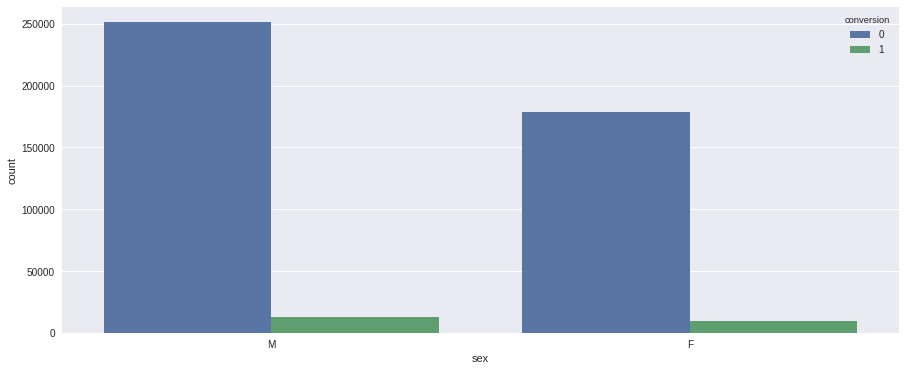

In [20]:
plt.figure(figsize=(15,6))
sns.countplot(x="country", hue="conversion", data=df)
plt.figure(figsize=(15,6))
sns.countplot(x="sex", hue="conversion", data=df)

In [21]:
df.head()

user_id        date  source  device browser_language ads_channel  \
0   315281  2015-12-03  Direct     Web               ES         NaN   
1   497851  2015-12-04     Ads     Web               ES      Google   
2   848402  2015-12-04     Ads     Web               ES    Facebook   
3   290051  2015-12-03     Ads  Mobile            Other    Facebook   
4   548435  2015-11-30     Ads     Web               ES      Google   

       browser  conversion  test sex  age country  
0           IE           1     0   M   32   Spain  
1           IE           0     1   M   21  Mexico  
2       Chrome           0     0   M   34   Spain  
3  Android_App           0     1   F   22  Mexico  
4      FireFox           0     1   M   19  Mexico

In [22]:
np.random.seed(5)
test_group = df[df.test == 1].sample(20000)
test_group['Group'] = 'test'
len(test_group)

20000

In [23]:
np.random.seed(5)
control_group = df[df.test == 0].sample(20000)
control_group['Group'] = 'control'
len(control_group)

20000

In [24]:
# conversion rate when no test is done
baseline_conversion = float(len(df[(df.conversion == 1)&(df.test == 0)])*100/len(df[df.test == 0]))
baseline_conversion

5.0

In [0]:
test_group = test_group.append(control_group)

In [27]:
table = test_group[['conversion','Group']].pivot_table(values='conversion', index='Group', aggfunc=np.sum)
table['rate'] = table['conversion']*2/len(test_group)
table

conversion     rate
Group                       
control        1127  0.05635
test            905  0.04525

In [0]:
p_test = table['rate'][1]
p_control = table['rate'][0]
control_convert = table['conversion'][0]
test_convert = table['conversion'][1]


In [29]:
import scipy, scipy.stats
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,10))
xA = np.linspace(0, 2000, 2000+1)
yA = scipy.stats.binom.pmf(xA,20000,p_control)
ax.bar(xA, yA, alpha=0.5, width=2, label = 'control_group')

xB = np.linspace(0,2000, 2000+1)
yB = scipy.stats.binom.pmf(xB,20000,p_test)
ax.bar(xB, yB, alpha=0.5, width =2, label = 'test_group')
plt.xlabel('converted')
plt.ylabel('probability')
plt.legend()


proposed 2 hypothesis senarios:


    H0(null hypothesis):there is no change in conversion rate with the localized translation system
    H1(Alternative hypothesis): there is a change in conversion rate with the localized translation system

significance level used :0.05

In [30]:
from numpy.random import normal
from scipy.stats import ttest_ind

value, pvalue = ttest_ind(yA, yB, equal_var=False)
print(value, pvalue)
if pvalue > 0.05:
    print('Change in translation system has no effect (fail to reject H0)')
else:
    print('Change in translation system has a positive impact(reject H0)')


(-1.273295046989073e-12, 0.9999999999989841)
Change in translation system has no effect (fail to reject H0)


Based on the null hypothesis testing, we can conclude that the localized translation system has no effect on the customer conversion rate

In [0]:
#df[['source','device','browser_language','ads_channel','browser','conversion','sex','age','country']]

younger population tens to have higher conversion rate

In [32]:
df[df['conversion'] == 1]['age'].hist(figsize =(12,5), bins = 20)
plt.xlabel('age')


Text(0.5,0,u'age')

Analysis of possible factors contributed to conversion rate

Based on this analysis, source of advertisement has the lowest customer conversion rate. For ad channels, Facebook and Google yeild the highest conversion rate.

Therefore, the company might have to adjust the source of advertisement and ad channels to get a higher conversion rate.

In [33]:
df.groupby('source')['conversion'].sum().to_frame()

conversion
source            
Ads           9043
Direct        4510
SEO           8891

In [34]:
df.groupby('device')['conversion'].sum().to_frame()

conversion
device            
Mobile       10097
Web          12347

In [35]:
df.groupby('browser')['conversion'].sum().to_frame()

conversion
browser                
Android_App        7751
Chrome             5033
FireFox            2023
IE                 3030
Iphone_App         2346
Opera               327
Safari             1934

In [36]:
df.groupby('ads_channel')['conversion'].sum().to_frame()

conversion
ads_channel            
Bing                668
Facebook           3466
Google             3346
Other               184
Yahoo              1379